

<hr style="margin-bottom: 40px;">

# AMDT - MPF Portfolio Optimization Model

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## (A) Understanding the data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

#plt.style.use('fivethirtyeight')
df = pd.read_excel("AMTD.xlsx", parse_dates=True, index_col="date")


In [2]:
df.apply(pd.to_numeric, errors='ignore')
df = df.rename(columns=lambda x: x.strip())
df

,AMRCBLF HK Equity,AMRCASF HK Equity,AMRDALF HK Equity,AMRCGRF HK Equity,AMRSGRF HK Equity,AMINAGP HK Equity,AMINASF HK Equity,AMINCAA HK Equity,AMINEUF HK Equity,AMIGBOF HK Equity,AMIHKCF HK Equity,AMIMCOF HK Equity,AMIT18R HK Equity,AMIT28R HK Equity,AMIT38R HK Equity,AMIT48R HK Equity
date,,,,,,,,,,,,,,,,
2000-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,16.39,13.39,13.18,18.00,14.95,11.6316,17.4413,12.0733,14.6092,11.4594,16.7664,10.1914,14.1907,15.3507,16.8613,17.6810
2020-07-28,16.48,13.43,13.18,18.12,15.01,11.6361,17.6109,12.0575,14.6926,11.4906,16.9794,10.1913,14.2466,15.4165,16.9393,17.7709
2020-07-29,16.52,13.45,13.20,18.17,15.04,11.6509,17.5575,12.1054,14.6512,11.4927,17.0443,10.1913,14.2541,15.4267,16.9526,17.7882


In [3]:
df.info() #dropped the funds that have not enough data for analysis. #no need for type conversion.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5053 entries, 2000-12-01 to 2020-07-31
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AMRCBLF HK Equity  2617 non-null   float64
 1   AMRCASF HK Equity  2617 non-null   float64
 2   AMRDALF HK Equity  2617 non-null   float64
 3   AMRCGRF HK Equity  2617 non-null   float64
 4   AMRSGRF HK Equity  189 non-null    float64
 5   AMINAGP HK Equity  684 non-null    float64
 6   AMINASF HK Equity  2617 non-null   float64
 7   AMINCAA HK Equity  684 non-null    float64
 8   AMINEUF HK Equity  2617 non-null   float64
 9   AMIGBOF HK Equity  2617 non-null   float64
 10  AMIHKCF HK Equity  2617 non-null   float64
 11  AMIMCOF HK Equity  2617 non-null   float64
 12  AMIT18R HK Equity  2543 non-null   float64
 13  AMIT28R HK Equity  2617 non-null   float64
 14  AMIT38R HK Equity  2601 non-null   float64
 15  AMIT48R HK Equity  2617 non-null   float64
dtypes: flo

In [4]:
df = df.drop(["AMRSGRF HK Equity", "AMINAGP HK Equity", "AMINCAA HK Equity"],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5053 entries, 2000-12-01 to 2020-07-31
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AMRCBLF HK Equity  2617 non-null   float64
 1   AMRCASF HK Equity  2617 non-null   float64
 2   AMRDALF HK Equity  2617 non-null   float64
 3   AMRCGRF HK Equity  2617 non-null   float64
 4   AMINASF HK Equity  2617 non-null   float64
 5   AMINEUF HK Equity  2617 non-null   float64
 6   AMIGBOF HK Equity  2617 non-null   float64
 7   AMIHKCF HK Equity  2617 non-null   float64
 8   AMIMCOF HK Equity  2617 non-null   float64
 9   AMIT18R HK Equity  2543 non-null   float64
 10  AMIT28R HK Equity  2617 non-null   float64
 11  AMIT38R HK Equity  2601 non-null   float64
 12  AMIT48R HK Equity  2617 non-null   float64
dtypes: float64(13)
memory usage: 552.7 KB


In [5]:
df.tail()  #check if funds are still in operation till now

,AMRCBLF HK Equity,AMRCASF HK Equity,AMRDALF HK Equity,AMRCGRF HK Equity,AMINASF HK Equity,AMINEUF HK Equity,AMIGBOF HK Equity,AMIHKCF HK Equity,AMIMCOF HK Equity,AMIT18R HK Equity,AMIT28R HK Equity,AMIT38R HK Equity,AMIT48R HK Equity
date,,,,,,,,,,,,,
2020-07-27,16.39,13.39,13.18,18.00,17.4413,14.6092,11.4594,16.7664,10.1914,14.1907,15.3507,16.8613,17.6810
2020-07-28,16.48,13.43,13.18,18.12,17.6109,14.6926,11.4906,16.9794,10.1913,14.2466,15.4165,16.9393,17.7709
2020-07-29,16.52,13.45,13.20,18.17,17.5575,14.6512,11.4927,17.0443,10.1913,14.2541,15.4267,16.9526,17.7882
2020-07-30,16.46,13.44,13.19,18.08,17.6800,14.3242,11.5174,16.9541,10.1913,14.2433,15.3936,16.8905,17.6938
2020-07-31,16.45,13.43,13.19,18.05,17.5798,14.2983,11.5579,16.9242,10.1910,14.2689,15.4083,16.8911,17.6765


In [6]:
df.dropna(axis="index",how="all") #drop NaN values. The earliest data starts from 2010-4-5.

,AMRCBLF HK Equity,AMRCASF HK Equity,AMRDALF HK Equity,AMRCGRF HK Equity,AMINASF HK Equity,AMINEUF HK Equity,AMIGBOF HK Equity,AMIHKCF HK Equity,AMIMCOF HK Equity,AMIT18R HK Equity,AMIT28R HK Equity,AMIT38R HK Equity,AMIT48R HK Equity
date,,,,,,,,,,,,,
2010-04-05,11.08,10.54,10.13,11.39,11.7935,11.0679,10.1219,11.3104,9.9998,NaN,11.0246,NaN,11.4454
2010-04-06,11.20,10.60,10.15,11.54,11.9296,11.1473,10.1388,11.4125,9.9998,NaN,11.1061,NaN,11.5629
2010-04-07,11.21,10.57,10.13,11.58,11.9804,11.1465,10.0975,11.4125,9.9998,NaN,11.1087,NaN,11.5901
2010-04-08,11.21,10.57,10.13,11.57,11.9458,11.1507,10.0639,11.3053,9.9998,NaN,11.0658,NaN,11.5434
2010-04-09,11.24,10.58,10.14,11.60,12.0070,11.1041,10.0841,11.3910,9.9998,NaN,11.0880,NaN,11.5662
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,16.39,13.39,13.18,18.00,17.4413,14.6092,11.4594,16.7664,10.1914,14.1907,15.3507,16.8613,17.6810
2020-07-28,16.48,13.43,13.18,18.12,17.6109,14.6926,11.4906,16.9794,10.1913,14.2466,15.4165,16.9393,17.7709
2020-07-29,16.52,13.45,13.20,18.17,17.5575,14.6512,11.4927,17.0443,10.1913,14.2541,15.4267,16.9526,17.7882


In [7]:
describe = df.describe()
describe

,AMRCBLF HK Equity,AMRCASF HK Equity,AMRDALF HK Equity,AMRCGRF HK Equity,AMINASF HK Equity,AMINEUF HK Equity,AMIGBOF HK Equity,AMIHKCF HK Equity,AMIMCOF HK Equity,AMIT18R HK Equity,AMIT28R HK Equity,AMIT38R HK Equity,AMIT48R HK Equity
count,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2543.000000,2617.000000,2601.000000,2617.000000
mean,13.008781,11.435797,11.426458,13.984215,14.396799,14.393210,10.355622,13.331739,10.022405,12.211078,12.989095,13.801791,14.297824
std,1.598254,0.745137,0.802417,2.066649,1.853161,2.706996,0.312357,2.285998,0.044556,1.050875,1.438767,2.009521,2.400255
min,9.810000,9.800000,9.920000,9.700000,9.733800,9.300800,9.620400,8.487900,9.998800,10.043800,10.129000,9.929800,9.646900
25%,11.770000,10.900000,10.640000,12.400000,13.115800,11.604900,10.165100,11.657500,10.000700,11.334550,11.795000,12.179600,12.429200
50%,12.920000,11.370000,11.550000,13.920000,14.105300,14.942800,10.311300,12.710800,10.007500,12.222800,13.000500,13.709500,14.164300
75%,14.280000,11.970000,12.030000,15.670000,15.579200,16.687300,10.524900,15.375500,10.009500,12.970400,14.150900,15.506900,16.229900
max,16.810000,13.450000,13.230000,19.050000,18.494900,19.560400,11.557900,19.268300,10.191400,14.356300,15.928500,17.937800,19.455800


Text(0.5, 1.0, 'Performance of AMTD Funds')

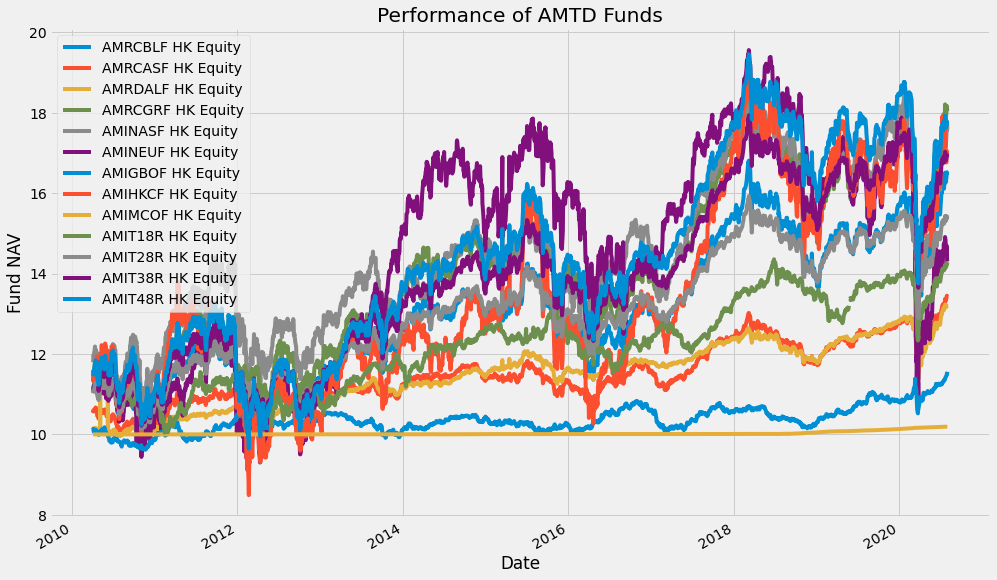

In [8]:
plt.style.use('fivethirtyeight')
df.plot(figsize=(15,10))
plt.xlabel('Date')
plt.ylabel('Fund NAV')
plt.title("Performance of AMTD Funds")

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## (B) - Data Modelling



### Efficient Frontier - calculating expected return and risk matrix

In [9]:
#!pip install PyPortfolioOpt

In [10]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting

In [11]:
from pypfopt.risk_models import CovarianceShrinkage
S = CovarianceShrinkage(df).ledoit_wolf()

In [12]:
S

,AMRCBLF HK Equity,AMRCASF HK Equity,AMRDALF HK Equity,AMRCGRF HK Equity,AMINASF HK Equity,AMINEUF HK Equity,AMIGBOF HK Equity,AMIHKCF HK Equity,AMIMCOF HK Equity,AMIT18R HK Equity,AMIT28R HK Equity,AMIT38R HK Equity,AMIT48R HK Equity
AMRCBLF HK Equity,1.154543e-02,4.959470e-03,0.003217,1.439727e-02,0.011751,0.014502,0.000197,0.016810,5.010192e-07,1.083372e-03,8.176409e-03,1.056849e-02,1.305717e-02
AMRCASF HK Equity,4.959470e-03,2.794795e-03,0.001544,6.137718e-03,0.004982,0.005628,0.000515,0.006995,7.036768e-07,5.296393e-04,3.557241e-03,4.448044e-03,5.380899e-03
AMRDALF HK Equity,3.217365e-03,1.543637e-03,0.010389,4.086521e-03,0.003562,0.004191,0.000158,0.004621,1.921748e-06,4.064346e-04,2.298263e-03,2.959425e-03,3.638350e-03
AMRCGRF HK Equity,1.439727e-02,6.137718e-03,0.004087,1.892700e-02,0.015092,0.019354,-0.000013,0.021775,4.678912e-07,1.334733e-03,1.058213e-02,1.377503e-02,1.709845e-02
AMINASF HK Equity,1.175140e-02,4.981633e-03,0.003562,1.509196e-02,0.032003,0.018761,0.000723,0.020438,-2.157718e-06,1.301287e-03,9.728136e-03,1.244447e-02,1.526530e-02
AMINEUF HK Equity,1.450206e-02,5.628382e-03,0.004191,1.935364e-02,0.018761,0.038667,-0.000028,0.018554,-2.672873e-06,1.504414e-03,1.235179e-02,1.624224e-02,2.015506e-02
AMIGBOF HK Equity,1.969990e-04,5.145214e-04,0.000158,-1.326106e-05,0.000723,-0.000028,0.001323,0.000293,1.738022e-06,1.876264e-04,7.028168e-04,5.244266e-04,3.756540e-04
AMIHKCF HK Equity,1.681027e-02,6.995481e-03,0.004621,2.177466e-02,0.020438,0.018554,0.000293,0.035708,1.285536e-06,1.358738e-03,1.329997e-02,1.714986e-02,2.115997e-02
AMIMCOF HK Equity,5.010192e-07,7.036768e-07,0.000002,4.678912e-07,-0.000002,-0.000003,0.000002,0.000001,1.484115e-04,5.042017e-07,9.267557e-07,6.406956e-07,3.202132e-07
AMIT18R HK Equity,1.083372e-03,5.296393e-04,0.000406,1.334733e-03,0.001301,0.001504,0.000188,0.001359,5.042017e-07,4.119831e-03,7.597278e-04,9.613203e-04,1.170269e-03


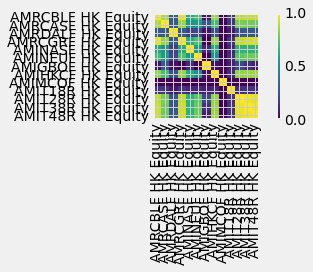

In [13]:
plotting.plot_covariance(S, plot_correlation=True)

In [14]:
#Calculate the expected returns and the annualised sample covariance matrix of daily asset returns.

from pypfopt.expected_returns import mean_historical_return
mu = mean_historical_return(df)


In [15]:
mu

AMRCBLF HK Equity    0.038802
AMRCASF HK Equity    0.023617
AMRDALF HK Equity    0.025753
AMRCGRF HK Equity    0.045350
AMINASF HK Equity    0.039204
AMINEUF HK Equity    0.024976
AMIGBOF HK Equity    0.012862
AMIHKCF HK Equity    0.039587
AMIMCOF HK Equity    0.001826
AMIT18R HK Equity    0.027979
AMIT28R HK Equity    0.032775
AMIT38R HK Equity    0.040590
AMIT48R HK Equity    0.042759
dtype: float64

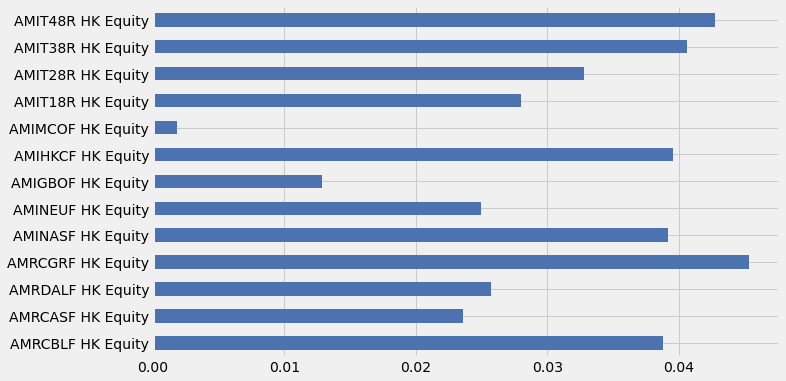

In [16]:
mu.plot.barh(figsize=(10,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Function 1a - Portfolio Optimization for maximal Sharpe ratio

### i.e. What combo of funds to choose within a scheme to earn the most and risk the least? 

OrderedDict([('AMRCBLF HK Equity', 0.0), ('AMRCASF HK Equity', 0.0), ('AMRDALF HK Equity', 0.00394), ('AMRCGRF HK Equity', 0.06551), ('AMINASF HK Equity', 0.0), ('AMINEUF HK Equity', 0.0), ('AMIGBOF HK Equity', 0.0), ('AMIHKCF HK Equity', 0.0), ('AMIMCOF HK Equity', 0.0), ('AMIT18R HK Equity', 0.48717), ('AMIT28R HK Equity', 0.0), ('AMIT38R HK Equity', 0.44338), ('AMIT48R HK Equity', 0.0)])


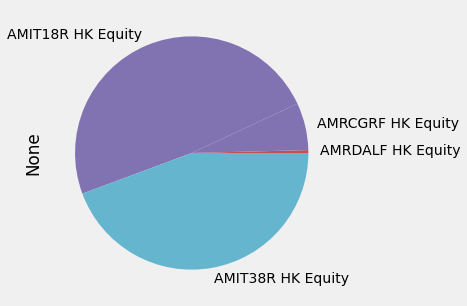

In [17]:
#Optimize for maximal Sharpe ratio.
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe() #Maximize the Sharpe ratio, and get the raw weights
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) #Note the weights may have some rounding error, meaning they may not add up exactly to 1 but should be close
pd.Series(cleaned_weights).plot.pie(figsize=(5,5))

In [18]:
rt,vol,sharpe = ef.portfolio_performance(verbose=True)

Expected annual return: 3.5%
Annual volatility: 6.8%
Sharpe Ratio: 0.22


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Function 1b - Long/short min variance

Objective - minimising variance. There is a good deal of research that demonstrates how global-minimum variance (GMV) portfolios outperform mean-variance optimised portfolios.

OrderedDict([('AMRCBLF HK Equity', -0.00418), ('AMRCASF HK Equity', 0.05862), ('AMRDALF HK Equity', 0.00757), ('AMRCGRF HK Equity', -0.01002), ('AMINASF HK Equity', -0.00177), ('AMINEUF HK Equity', 0.00204), ('AMIGBOF HK Equity', 0.06801), ('AMIHKCF HK Equity', -0.00161), ('AMIMCOF HK Equity', 0.85595), ('AMIT18R HK Equity', 0.02442), ('AMIT28R HK Equity', 0.00456), ('AMIT38R HK Equity', 0.00316), ('AMIT48R HK Equity', -0.00675)])


C:\Users\menal\New folder\lib\site-packages\pypfopt\efficient_frontier.py:111: UserWarning: No expected returns provided. You may only use ef.min_volatility()
  warnings.warn(


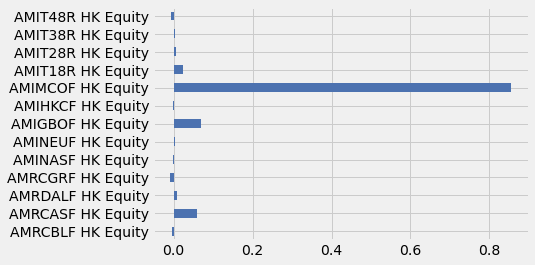

In [19]:
S = risk_models.CovarianceShrinkage(df).ledoit_wolf()

# You don't have to provide expected returns in this case
ef = EfficientFrontier(None, S, weight_bounds=(None, None))
ef.min_volatility()
weights = ef.clean_weights()
print(weights)

pd.Series(weights).plot.barh();

In [20]:
ef.portfolio_performance(verbose=True);

Annual volatility: 1.1%


In [21]:
#calculate the asset returns in our portfolio.
ret_data = df.pct_change()[1:]

#calculate the weighted returns of our assets.
weighted_returns = (weights * ret_data)

#portfolio returns are simply the sum of the weighted returns of the assets. So lets add the rows.
port_ret = weighted_returns.sum(axis=1)
print("Portfolio return (%):")
print(sum(port_ret)*100)


Portfolio return (%):
4.149837064204907


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Function 2a - Portfolio Optimization with given Risk Tolerance

### i.e. If your risk tolerance is higher, tell us what you expect and earn more return!

In [22]:
#Input your risk tolerance.
#rt = float(input("Your Risk tolerance in decimals:"))    

In [23]:
ef = EfficientFrontier(mu, S)

ef.efficient_risk(target_volatility=0.1)                    
weights = ef.clean_weights()
weights

OrderedDict([('AMRCBLF HK Equity', 0.0),
             ('AMRCASF HK Equity', 0.0),
             ('AMRDALF HK Equity', 0.0),
             ('AMRCGRF HK Equity', 0.47363),
             ('AMINASF HK Equity', 0.0),
             ('AMINEUF HK Equity', 0.0),
             ('AMIGBOF HK Equity', 0.0),
             ('AMIHKCF HK Equity', 0.0),
             ('AMIMCOF HK Equity', 0.0),
             ('AMIT18R HK Equity', 0.21622),
             ('AMIT28R HK Equity', 0.0),
             ('AMIT38R HK Equity', 0.31015),
             ('AMIT48R HK Equity', 0.0)])

Text(0.5, 1.0, 'Fund Portfolio')

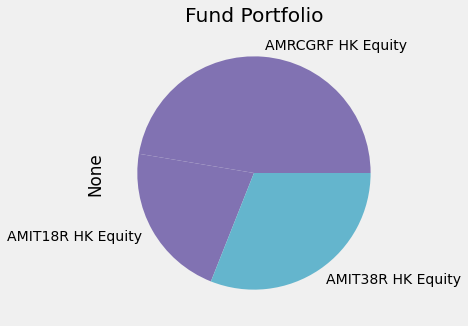

In [24]:
pd.Series(weights).plot.pie(figsize=(5,5))
plt.title("Fund Portfolio")

In [25]:
rt,vol,sharpe = ef.portfolio_performance(verbose=True)

Expected annual return: 4.0%
Annual volatility: 10.0%
Sharpe Ratio: 0.20


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Function 2b - Minimise risk for a given return

In [26]:
#tarret = float(input("Your target return:"))    

In [27]:
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))
ef.efficient_return(target_return=0.04, market_neutral=True)
weights = ef.clean_weights()
weights

OrderedDict([('AMRCBLF HK Equity', 0.20487),
             ('AMRCASF HK Equity', 0.06317),
             ('AMRDALF HK Equity', 0.09657),
             ('AMRCGRF HK Equity', -0.07206),
             ('AMINASF HK Equity', 0.03428),
             ('AMINEUF HK Equity', -0.32094),
             ('AMIGBOF HK Equity', -0.30894),
             ('AMIHKCF HK Equity', -0.36383),
             ('AMIMCOF HK Equity', -1.0),
             ('AMIT18R HK Equity', 0.45375),
             ('AMIT28R HK Equity', 0.41909),
             ('AMIT38R HK Equity', 1.0),
             ('AMIT48R HK Equity', -0.20596)])

In [28]:
rt,vol,sharpe = ef.portfolio_performance(verbose=True)

Expected annual return: 4.0%
Annual volatility: 6.1%
Sharpe Ratio: 0.33


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Plotting Efficient Frontier

In [29]:
from pypfopt import CLA, plotting

cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);

Expected annual return: 1.4%
Annual volatility: 2.1%
Sharpe Ratio: -0.28


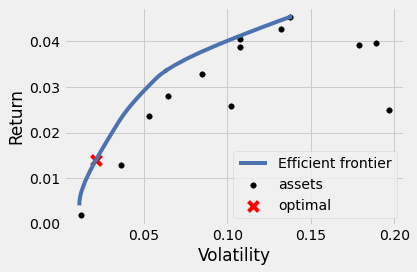

In [30]:
ax = plotting.plot_efficient_frontier(cla, showfig=False)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# This scheme in a nutshell:

In [31]:
risktolerance, annualreturn = [], []
for rt2 in np.arange(0.012, 1, 0.001):
    ef = EfficientFrontier(mu, S)
    ef.efficient_risk(target_volatility=rt2)
    weights = ef.clean_weights()
    ret, volatility, Sharpe = ef.portfolio_performance(verbose=True)
    annualreturn.append(ret)
    risktolerance.append(rt2)


Expected annual return: 0.6%
Annual volatility: 1.2%
Sharpe Ratio: -1.15
Expected annual return: 0.8%
Annual volatility: 1.3%
Sharpe Ratio: -0.96
Expected annual return: 0.9%
Annual volatility: 1.4%
Sharpe Ratio: -0.82
Expected annual return: 0.9%
Annual volatility: 1.5%
Sharpe Ratio: -0.70
Expected annual return: 1.0%
Annual volatility: 1.6%
Sharpe Ratio: -0.61
Expected annual return: 1.1%
Annual volatility: 1.7%
Sharpe Ratio: -0.53
Expected annual return: 1.2%
Annual volatility: 1.8%
Sharpe Ratio: -0.46
Expected annual return: 1.2%
Annual volatility: 1.9%
Sharpe Ratio: -0.40
Expected annual return: 1.3%
Annual volatility: 2.0%
Sharpe Ratio: -0.34
Expected annual return: 1.4%
Annual volatility: 2.1%
Sharpe Ratio: -0.30
Expected annual return: 1.4%
Annual volatility: 2.2%
Sharpe Ratio: -0.25
Expected annual return: 1.5%
Annual volatility: 2.3%
Sharpe Ratio: -0.21
Expected annual return: 1.6%
Annual volatility: 2.4%
Sharpe Ratio: -0.18
Expected annual return: 1.6%
Annual volatility: 2.5

Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.

Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.

Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.

Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Ann

Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Ann

Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.

Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.

Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.

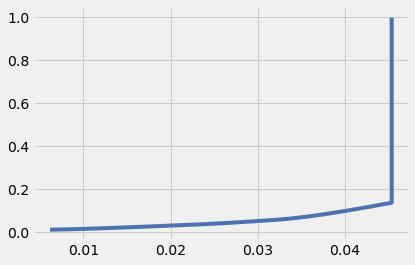

In [32]:
plt.plot(annualreturn, risktolerance)

##         Any portfolio with volatility higher than 4.5% is bad because you earn the same afterwards. The highest return you can get is 13.8%.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Function 3 - Discrete Allocation of each fund

### i.e. How many shares for each fund should I buy?

In [33]:
#Input amount of your portfolio
tpv = float(input("Amount of your portfolio:"))     

Amount of your portfolio:15000


In [34]:
#!pip install pulp
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df)
print("Latest Price of all funds")
latest_prices

Latest Price of all funds


AMRCBLF HK Equity    16.4500
AMRCASF HK Equity    13.4300
AMRDALF HK Equity    13.1900
AMRCGRF HK Equity    18.0500
AMINASF HK Equity    17.5798
AMINEUF HK Equity    14.2983
AMIGBOF HK Equity    11.5579
AMIHKCF HK Equity    16.9242
AMIMCOF HK Equity    10.1910
AMIT18R HK Equity    14.2689
AMIT28R HK Equity    15.4083
AMIT38R HK Equity    16.8911
AMIT48R HK Equity    17.6765
Name: 2020-07-31 00:00:00, dtype: float64

In [35]:
cleaned_weights = ef.clean_weights()
weights = cleaned_weights 
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=tpv)   
allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'AMRCGRF HK Equity': 831}
Funds remaining: $0.45


Text(0.5, 0, 'Weight of each fund')

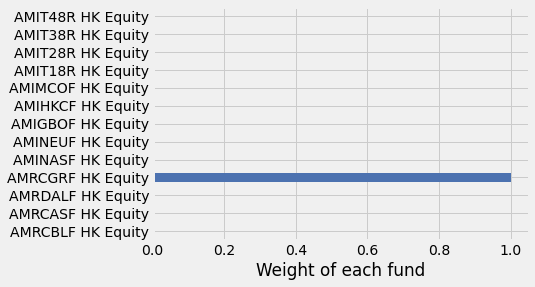

In [36]:
pd.Series(weights).plot.barh()
plt.xlabel('Weight of each fund')